Leauge of Legends (LoL) is a popular Multiplayer online battle arena (MOBA) game developed by Riot Games. Two teams of 5 players compete to destroy the other's nexus. The game requires strategy, coordination and critical thinking. There are many ways teams gain advatages and wins, but the most quanitfiable and coomon are by obtaining kills, gold, objectives, map vision and levels. For more information about the game i urge you to read the game's [tutorial page](https://www.leagueoflegends.com/en-us/how-to-play/#:~:text=League%20of%20Legends%20is%20a,battle%20your%20way%20to%20victory)

The game is international recignoised in competitive esports with the first international championship in 2013. And in 2023 with a prize pool of $2.2 USD Teams are eager to win and be recoginzed as the best of the best.[Source](https://lol.fandom.com/wiki/2023_Season_World_Championship).

Much like tradional sports teams as curious to know what conditions lead to the best win condition. I'm intersted in making a binary classifer with pytorch, we train a neural network to predict game outcomes.

In [261]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import DataLoader

First lets import the data as a dataframe
[Dataset Source from Kaggle](https://www.kaggle.com/datasets/jakejoeanderson/league-of-legends-diamond-matches-ff15/data)

In [262]:
league = pd.read_csv("LoL_15_Diamond.csv")
league.keys()

Index(['match_id', 'blue_Win', 'blue_Wards', 'blue_Yellow_Wards',
       'blue_Sight_Wards', 'blue_Blue_Wards', 'blue_Control_Wards',
       'blue_Wards_Destroyed', 'blue_First_Blood', 'blue_Kills', 'blue_Aces',
       'blue_Assists', 'blue_Void_Grubs', 'blue_Dragons', 'blue_Cloud_Drake',
       'blue_Infernal_Drake', 'blue_Mountain_Drake', 'blue_Ocean_Drake',
       'blue_Chemtech_Drake', 'blue_Hextech_Drake', 'blue_Heralds',
       'blue_Towers_Destroyed', 'blue_Top_Towers_Destroyed',
       'blue_Mid_Towers_Destroyed', 'blue_Bot_Towers_Destroyed',
       'blue_Turret_Plates', 'blue_Inhibitors', 'blue_Top_Inhibitor',
       'blue_Mid_Inhibitor', 'blue_Bot_Inhibitor', 'blue_Top_Plates',
       'blue_Mid_Plates', 'blue_Bot_Plates', 'blue_Total_Gold',
       'blue_Total_Level', 'blue_Avg_Level', 'blue_Total_XP', 'blue_Total_CS',
       'blue_Total_Jungle_Monsters', 'blue_Gold_Diff', 'blue_XP_Diff',
       'blue_Magic_Dmg', 'blue_Physical_Dmg', 'blue_True_Dmg',
       'blue_Total_Dmg', '

In [263]:
league

,match_id,blue_Win,blue_Wards,blue_Yellow_Wards,blue_Sight_Wards,blue_Blue_Wards,blue_Control_Wards,blue_Wards_Destroyed,blue_First_Blood,blue_Kills,...,red_Avg_Level,red_Total_XP,red_Total_CS,red_Total_Jungle_Monsters,red_Gold_Diff,red_XP_Diff,red_Magic_Dmg,red_Physical_Dmg,red_True_Dmg,red_Total_Dmg
0,NA1_4959489871,1.0,22.0,10.0,9.0,0.0,2.0,8.0,1.0,14.0,...,9.2,28335.0,300.0,76.0,-2925.0,-620.0,10969.0,16477.0,678.0,28127.0
1,NA1_4959433709,0.0,63.0,16.0,3.0,0.0,2.0,3.0,0.0,15.0,...,9.2,28344.0,317.0,80.0,1397.0,-244.0,8733.0,23898.0,1292.0,33926.0
2,NA1_4959406776,1.0,26.0,19.0,2.0,2.0,3.0,0.0,1.0,14.0,...,9.0,27118.0,337.0,84.0,-58.0,-2804.0,16146.0,11446.0,1893.0,29490.0
3,NA1_4959124290,1.0,140.0,18.0,5.0,0.0,3.0,6.0,0.0,17.0,...,9.0,28779.0,357.0,70.0,-3082.0,-3642.0,12668.0,19022.0,3303.0,34994.0
4,NA1_4959103781,1.0,144.0,20.0,7.0,0.0,2.0,3.0,0.0,18.0,...,9.0,28009.0,339.0,86.0,-5003.0,-2592.0,8574.0,20283.0,296.0,29155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,NA1_4959189957,1.0,22.0,15.0,7.0,0.0,0.0,7.0,1.0,19.0,...,9.0,28503.0,358.0,88.0,-6661.0,-1715.0,14347.0,9614.0,1083.0,25049.0
21511,NA1_4960037601,0.0,32.0,18.0,7.0,0.0,5.0,7.0,0.0,15.0,...,9.0,28026.0,321.0,60.0,5581.0,2298.0,15482.0,29784.0,1150.0,46418.0
21512,NA1_4958099242,1.0,25.0,21.0,4.0,0.0,0.0,5.0,0.0,11.0,...,9.0,28463.0,314.0,100.0,616.0,-147.0,13627.0,15116.0,986.0,29733.0
21513,NA1_4956218916,1.0,28.0,16.0,9.0,0.0,3.0,7.0,0.0,11.0,...,9.0,29272.0,357.0,78.0,-79.0,-2260.0,7095.0,20610.0,1751.0,29459.0


In [264]:
#filter the dataset
league_clean  = league.drop(['match_id',
       'blue_Sight_Wards', 'blue_Blue_Wards', 'blue_Control_Wards','blue_Cloud_Drake',
        'blue_Infernal_Drake', 'blue_Mountain_Drake', 'blue_Ocean_Drake',
      'blue_Chemtech_Drake', 'blue_Hextech_Drake','blue_Top_Towers_Destroyed',
       'blue_Mid_Towers_Destroyed', 'blue_Bot_Towers_Destroyed','blue_Top_Inhibitor',
       'blue_Mid_Inhibitor', 'blue_Bot_Inhibitor', 'blue_Top_Plates',
       'blue_Mid_Plates', 'blue_Bot_Plates','blue_Total_XP','blue_Magic_Dmg', 'blue_Physical_Dmg', 'blue_True_Dmg',
       'blue_XP_Diff','blue_Gold_Diff',
      'red_Yellow_Wards', 'red_Sight_Wards', 'red_Blue_Wards', 'red_Control_Wards','red_Cloud_Drake',
      'red_Infernal_Drake', 'red_Mountain_Drake', 'red_Ocean_Drake',
      'red_Chemtech_Drake', 'red_Hextech_Drake','red_Top_Towers_Destroyed',
       'red_Mid_Towers_Destroyed', 'red_Bot_Towers_Destroyed','red_Top_Inhibitor',
       'red_Mid_Inhibitor', 'red_Bot_Inhibitor', 'red_Top_Plates',
        'red_Mid_Plates', 'red_Bot_Plates','red_Total_XP','red_Magic_Dmg', 'red_Physical_Dmg', 'red_True_Dmg','red_XP_Diff','red_Gold_Diff'],axis=1)


In [265]:
league_clean

,blue_Win,blue_Wards,blue_Yellow_Wards,blue_Wards_Destroyed,blue_First_Blood,blue_Kills,blue_Aces,blue_Assists,blue_Void_Grubs,blue_Dragons,...,red_Heralds,red_Towers_Destroyed,red_Turret_Plates,red_Inhibitors,red_Total_Gold,red_Total_Level,red_Avg_Level,red_Total_CS,red_Total_Jungle_Monsters,red_Total_Dmg
0,1.0,22.0,10.0,8.0,1.0,14.0,0.0,19.0,6.0,1.0,...,0.0,1.0,4.0,0.0,24633.0,46.0,9.2,300.0,76.0,28127.0
1,0.0,63.0,16.0,3.0,0.0,15.0,0.0,19.0,1.0,1.0,...,0.0,2.0,9.0,0.0,28892.0,46.0,9.2,317.0,80.0,33926.0
2,1.0,26.0,19.0,0.0,1.0,14.0,0.0,14.0,6.0,2.0,...,0.0,1.0,2.0,0.0,27065.0,45.0,9.0,337.0,84.0,29490.0
3,1.0,140.0,18.0,6.0,0.0,17.0,0.0,17.0,5.0,1.0,...,0.0,1.0,3.0,0.0,27498.0,45.0,9.0,357.0,70.0,34994.0
4,1.0,144.0,20.0,3.0,0.0,18.0,0.0,19.0,3.0,2.0,...,0.0,0.0,1.0,0.0,24449.0,45.0,9.0,339.0,86.0,29155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,1.0,22.0,15.0,7.0,1.0,19.0,0.0,26.0,6.0,2.0,...,0.0,0.0,0.0,0.0,25504.0,45.0,9.0,358.0,88.0,25049.0
21511,0.0,32.0,18.0,7.0,0.0,15.0,0.0,17.0,4.0,1.0,...,0.0,2.0,5.0,0.0,32247.0,45.0,9.0,321.0,60.0,46418.0
21512,1.0,25.0,21.0,5.0,0.0,11.0,0.0,14.0,2.0,1.0,...,0.0,0.0,4.0,0.0,26726.0,45.0,9.0,314.0,100.0,29733.0
21513,1.0,28.0,16.0,7.0,0.0,11.0,0.0,9.0,2.0,0.0,...,0.0,1.0,8.0,0.0,27764.0,45.0,9.0,357.0,78.0,29459.0


Why i remove some parameters:
match_id is the only obvious parameter that doesn't affect game outcome as the name suggests it is a numerical match identifier.

# 1) Monsters
LoL has many monsters such as dragons Rift Herald, Baron Nasor and void grubs that provide additional benefits to players such as gold, power and experience.
Teams who obtain these monsters gain significant advantage throughout the game. However since i am interested in if a parameter offers an advantage or not, I omit subcategories of dragons (Cloud, Infernal, Mountain, Ocean, Hextech) and keep the total number of dragons as a parameter. This way i can observe how monsters and dragons as a whole provide a team. I do this in general for the other parameters i omit.

**Keep the primary parameter in the model and omit sub-categories of the parameter.**

# 2) Wards
Wards, provide map vision similar to using a flashlight in the dark, or leaving a lamp on, the light wards emit allow a player to see information about the map that would be otherwise unknown. Wards can provide gold to the player by placing their own or destorying the oponents wards.

Similar to the monsters case i omit sub-categories of wards (red, blue, yellow,control) and keep the total number of wards a parameter.

# 3) Towers and Inhibitors:
Destroying towers and inhitibors in each lane allows a team to apporach the nexus much more safely and obtain more gold and experience per player. I omit subcategeories of tower and Inhibitor and the same for the Tower plates in each lane (Top, Mid, Bot) and keep total towers destoryed and total inhibitors destoryed. One important note, this dataset only collects data for the first 15 minutes of each game, Inhibtiors are late game objectives (>20 minutes) so it is unlikely many are in the dataset.

# 4) Damage
Keep total team damage omit subcategories (Magic, Physical, True)

# 5) Expeirence and Experience difference
Levels quatify the same information of experience [as shown in this table](https://leagueoflegends.fandom.com/wiki/Experience_(champion)). We can look at levels from 1-18 per team to quanitify the same information, and this way we don't pass large numbers into the model.

#6) Gold Difference
Redudant information, we know the total gold of each team already.

In [266]:
league_clean

,blue_Win,blue_Wards,blue_Yellow_Wards,blue_Wards_Destroyed,blue_First_Blood,blue_Kills,blue_Aces,blue_Assists,blue_Void_Grubs,blue_Dragons,...,red_Heralds,red_Towers_Destroyed,red_Turret_Plates,red_Inhibitors,red_Total_Gold,red_Total_Level,red_Avg_Level,red_Total_CS,red_Total_Jungle_Monsters,red_Total_Dmg
0,1.0,22.0,10.0,8.0,1.0,14.0,0.0,19.0,6.0,1.0,...,0.0,1.0,4.0,0.0,24633.0,46.0,9.2,300.0,76.0,28127.0
1,0.0,63.0,16.0,3.0,0.0,15.0,0.0,19.0,1.0,1.0,...,0.0,2.0,9.0,0.0,28892.0,46.0,9.2,317.0,80.0,33926.0
2,1.0,26.0,19.0,0.0,1.0,14.0,0.0,14.0,6.0,2.0,...,0.0,1.0,2.0,0.0,27065.0,45.0,9.0,337.0,84.0,29490.0
3,1.0,140.0,18.0,6.0,0.0,17.0,0.0,17.0,5.0,1.0,...,0.0,1.0,3.0,0.0,27498.0,45.0,9.0,357.0,70.0,34994.0
4,1.0,144.0,20.0,3.0,0.0,18.0,0.0,19.0,3.0,2.0,...,0.0,0.0,1.0,0.0,24449.0,45.0,9.0,339.0,86.0,29155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,1.0,22.0,15.0,7.0,1.0,19.0,0.0,26.0,6.0,2.0,...,0.0,0.0,0.0,0.0,25504.0,45.0,9.0,358.0,88.0,25049.0
21511,0.0,32.0,18.0,7.0,0.0,15.0,0.0,17.0,4.0,1.0,...,0.0,2.0,5.0,0.0,32247.0,45.0,9.0,321.0,60.0,46418.0
21512,1.0,25.0,21.0,5.0,0.0,11.0,0.0,14.0,2.0,1.0,...,0.0,0.0,4.0,0.0,26726.0,45.0,9.0,314.0,100.0,29733.0
21513,1.0,28.0,16.0,7.0,0.0,11.0,0.0,9.0,2.0,0.0,...,0.0,1.0,8.0,0.0,27764.0,45.0,9.0,357.0,78.0,29459.0


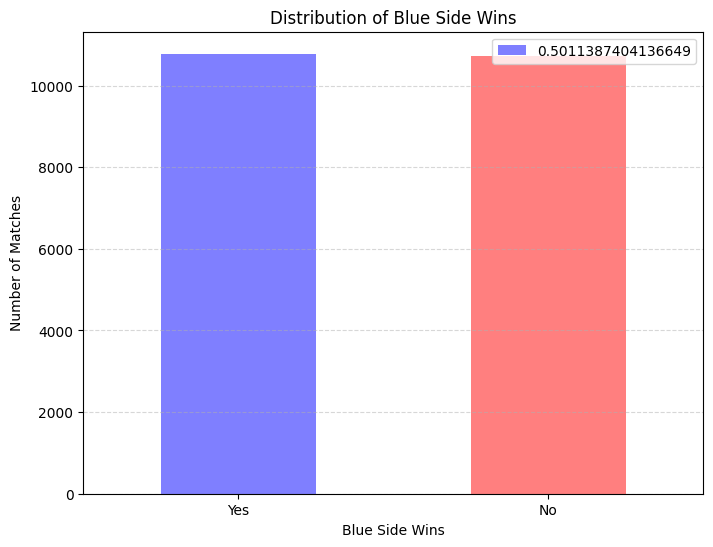

In [267]:
match_outcome = league_clean['blue_Win']

blue_side_wins = match_outcome.value_counts()
#show win percenta
b_win_percent = blue_side_wins[1.0]/(len(match_outcome))
r_win_percent = blue_side_wins[1.0]/len(match_outcome)
#i asked chatgpt for a plotting template here
# Plotting the bar chart
plt.figure(figsize=(8, 6))
blue_side_wins.plot(kind='bar', color=['blue', 'red'], alpha=0.5)
plt.title('Distribution of Blue Side Wins')
plt.xlabel('Blue Side Wins')
plt.ylabel('Number of Matches')
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
#fix
plt.legend([b_win_percent,r_win_percent])
plt.show()

In [268]:
league_clean.keys()

Index(['blue_Win', 'blue_Wards', 'blue_Yellow_Wards', 'blue_Wards_Destroyed',
       'blue_First_Blood', 'blue_Kills', 'blue_Aces', 'blue_Assists',
       'blue_Void_Grubs', 'blue_Dragons', 'blue_Heralds',
       'blue_Towers_Destroyed', 'blue_Turret_Plates', 'blue_Inhibitors',
       'blue_Total_Gold', 'blue_Total_Level', 'blue_Avg_Level',
       'blue_Total_CS', 'blue_Total_Jungle_Monsters', 'blue_Total_Dmg',
       'red_Win', 'red_Wards', 'red_Wards_Destroyed', 'red_First_Blood',
       'red_Kills', 'red_Aces', 'red_Assists', 'red_Void_Grubs', 'red_Dragons',
       'red_Heralds', 'red_Towers_Destroyed', 'red_Turret_Plates',
       'red_Inhibitors', 'red_Total_Gold', 'red_Total_Level', 'red_Avg_Level',
       'red_Total_CS', 'red_Total_Jungle_Monsters', 'red_Total_Dmg'],
      dtype='object')

In [269]:
#league_clean['blah'] = (league_clean['red_Total_Gold'] - league_clean['red_Total_Gold'].min())/(league_clean['red_Total_Gold'].max() -league_clean['red_Total_Gold'].min())
league_clean

def minmax(df, key):
  df[key] = (df[key] - df[key].min())/(df[key].max()- df[key].min())
  return df[key]
keys_to_clean = ['blue_Wards','blue_Total_CS','blue_Total_Level','blue_Total_Jungle_Monsters', 'blue_Total_Dmg','blue_Total_Gold','red_Wards','red_Total_CS',
       'red_Total_Jungle_Monsters', 'red_Total_Dmg','red_Total_Gold','red_Total_Level']
for item_keys in league_clean.keys():
  minmax(league_clean, item_keys)

In [270]:
league_clean


,blue_Win,blue_Wards,blue_Yellow_Wards,blue_Wards_Destroyed,blue_First_Blood,blue_Kills,blue_Aces,blue_Assists,blue_Void_Grubs,blue_Dragons,...,red_Heralds,red_Towers_Destroyed,red_Turret_Plates,red_Inhibitors,red_Total_Gold,red_Total_Level,red_Avg_Level,red_Total_CS,red_Total_Jungle_Monsters,red_Total_Dmg
0,1.0,0.026882,0.272727,0.150943,1.0,0.350,0.0,0.372549,1.000000,0.5,...,0.0,0.111111,0.266667,0.0,0.329432,0.631579,0.631579,0.441860,0.436782,0.400067
1,0.0,0.100358,0.545455,0.056604,0.0,0.375,0.0,0.372549,0.166667,0.5,...,0.0,0.222222,0.600000,0.0,0.503120,0.631579,0.631579,0.498339,0.459770,0.520937
2,1.0,0.034050,0.681818,0.000000,1.0,0.350,0.0,0.274510,1.000000,1.0,...,0.0,0.111111,0.133333,0.0,0.428612,0.578947,0.578947,0.564784,0.482759,0.428476
3,1.0,0.238351,0.636364,0.113208,0.0,0.425,0.0,0.333333,0.833333,0.5,...,0.0,0.111111,0.200000,0.0,0.446271,0.578947,0.578947,0.631229,0.402299,0.543198
4,1.0,0.245520,0.727273,0.056604,0.0,0.450,0.0,0.372549,0.500000,1.0,...,0.0,0.000000,0.066667,0.0,0.321928,0.578947,0.578947,0.571429,0.494253,0.421494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,1.0,0.026882,0.500000,0.132075,1.0,0.475,0.0,0.509804,1.000000,1.0,...,0.0,0.000000,0.000000,0.0,0.364952,0.578947,0.578947,0.634551,0.505747,0.335911
21511,0.0,0.044803,0.636364,0.132075,0.0,0.375,0.0,0.333333,0.666667,0.5,...,0.0,0.222222,0.333333,0.0,0.639941,0.578947,0.578947,0.511628,0.344828,0.781312
21512,1.0,0.032258,0.772727,0.094340,0.0,0.275,0.0,0.274510,0.333333,0.5,...,0.0,0.000000,0.266667,0.0,0.414787,0.578947,0.578947,0.488372,0.574713,0.433541
21513,1.0,0.037634,0.545455,0.132075,0.0,0.275,0.0,0.176471,0.333333,0.0,...,0.0,0.111111,0.533333,0.0,0.457118,0.578947,0.578947,0.631229,0.448276,0.427830


We now want to clean the data and save the win outcome as a target vector, as well as remove the match outcome from the dataset. Red win should also be removed as this is the second class we want to identify in the model.

$$
C_{red \ win}  = 1 - C_{blue \ win}
$$

```
match_outcome
```

After cleaning we have data from 21514 games and 36 parameters.

In [271]:
match_outcome = league_clean['blue_Win']
league_clean = league_clean.drop(['blue_Win','red_Win'],axis=1)
league_clean


,blue_Wards,blue_Yellow_Wards,blue_Wards_Destroyed,blue_First_Blood,blue_Kills,blue_Aces,blue_Assists,blue_Void_Grubs,blue_Dragons,blue_Heralds,...,red_Heralds,red_Towers_Destroyed,red_Turret_Plates,red_Inhibitors,red_Total_Gold,red_Total_Level,red_Avg_Level,red_Total_CS,red_Total_Jungle_Monsters,red_Total_Dmg
0,0.026882,0.272727,0.150943,1.0,0.350,0.0,0.372549,1.000000,0.5,0.0,...,0.0,0.111111,0.266667,0.0,0.329432,0.631579,0.631579,0.441860,0.436782,0.400067
1,0.100358,0.545455,0.056604,0.0,0.375,0.0,0.372549,0.166667,0.5,0.0,...,0.0,0.222222,0.600000,0.0,0.503120,0.631579,0.631579,0.498339,0.459770,0.520937
2,0.034050,0.681818,0.000000,1.0,0.350,0.0,0.274510,1.000000,1.0,0.0,...,0.0,0.111111,0.133333,0.0,0.428612,0.578947,0.578947,0.564784,0.482759,0.428476
3,0.238351,0.636364,0.113208,0.0,0.425,0.0,0.333333,0.833333,0.5,0.0,...,0.0,0.111111,0.200000,0.0,0.446271,0.578947,0.578947,0.631229,0.402299,0.543198
4,0.245520,0.727273,0.056604,0.0,0.450,0.0,0.372549,0.500000,1.0,0.0,...,0.0,0.000000,0.066667,0.0,0.321928,0.578947,0.578947,0.571429,0.494253,0.421494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,0.026882,0.500000,0.132075,1.0,0.475,0.0,0.509804,1.000000,1.0,0.0,...,0.0,0.000000,0.000000,0.0,0.364952,0.578947,0.578947,0.634551,0.505747,0.335911
21511,0.044803,0.636364,0.132075,0.0,0.375,0.0,0.333333,0.666667,0.5,0.0,...,0.0,0.222222,0.333333,0.0,0.639941,0.578947,0.578947,0.511628,0.344828,0.781312
21512,0.032258,0.772727,0.094340,0.0,0.275,0.0,0.274510,0.333333,0.5,0.0,...,0.0,0.000000,0.266667,0.0,0.414787,0.578947,0.578947,0.488372,0.574713,0.433541
21513,0.037634,0.545455,0.132075,0.0,0.275,0.0,0.176471,0.333333,0.0,0.0,...,0.0,0.111111,0.533333,0.0,0.457118,0.578947,0.578947,0.631229,0.448276,0.427830


Now lets build the model, first we split the dataset into a training and test set **WHY**
Using the sk.learn module we can randomly split the dataset into a test and training set, here split by 20% of the original data, same for the y outcomes.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(league_clean, match_outcome, test_size=0.2, random_state=50)
#FIX CONVERT TO TENSORS SEE BELOW
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values)
y_train = torch.FloatTensor(y_train.values)


In [273]:
class LOL_classification(torch.nn.Module):
    def __init__(self,shape):
        super(LOL_classification, self).__init__()
        self.linear = torch.nn.Linear(shape, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))




In [274]:
#evaluate accuracy - got for my assignment 4 and chatgpt
def accuracy(model, data, target):
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient computation
    with torch.no_grad():
        # Forward pass to get the predictions
        output = model(data).squeeze(1)

        # Get the index of the max log-probability (predicted class)
        pred = np.around(output.numpy())

        # Convert predictions and target to numpy arrays
        target = target.numpy().flatten()

        # Round the predictions using np.around

        # Calculate the fraction of matches
        matches = np.sum(np.equal(pred, target))
        total = len(target)
        acc = matches / total

    return acc

In [275]:
shape = len(league_clean.columns)
model = LOL_classification(shape=shape)
criterion = criterion = torch.nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [276]:
# Training loop  chatgpt

epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
acc = accuracy(model,X_train, y_train)
print(f"Accuracy : ",{acc*100},'%')

Epoch [1/10], Loss: 0.7140
Epoch [2/10], Loss: 0.7132
Epoch [3/10], Loss: 0.7124
Epoch [4/10], Loss: 0.7116
Epoch [5/10], Loss: 0.7109
Epoch [6/10], Loss: 0.7101
Epoch [7/10], Loss: 0.7094
Epoch [8/10], Loss: 0.7087
Epoch [9/10], Loss: 0.7080
Epoch [10/10], Loss: 0.7073
Accuracy :  {49.86637229839646} %
